In [1]:
# IMPORTING LIBRARIES

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# IMPORTING DATASET

df = pd.read_csv('Walmart.csv')

In [3]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
df.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [5]:
# COLUMNS

col_list = df.columns
col_list

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
# DATAFRAME SHAPE

df.shape

(6435, 8)

In [7]:
# CHECKING THE NUMBER OF STORES

df.Store.value_counts().sort_index()

1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Store, dtype: int64

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
#checking duplicate values

df.duplicated().sum()

0

In [10]:
#checking NULL values

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
# Change Date columns to datetime type

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.index = df['Date']
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05      1 2010-02-05    1643690.90             0        42.31   
2010-02-12      1 2010-02-12    1641957.44             1        38.51   
2010-02-19      1 2010-02-19    1611968.17             0        39.93   
2010-02-26      1 2010-02-26    1409727.59             0        46.63   
2010-03-05      1 2010-03-05    1554806.68             0        46.50   

            Fuel_Price         CPI  Unemployment  
Date                                              
2010-02-05       2.572  211.096358         8.106  
2010-02-12       2.548  211.242170         8.106  
2010-02-19       2.514  211.289143         8.106  
2010-02-26       2.561  211.319643         8.106  
2010-03-05       2.625  211.350143         8.106

In [12]:
# STATISTICAL DESCRIPTION 

df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

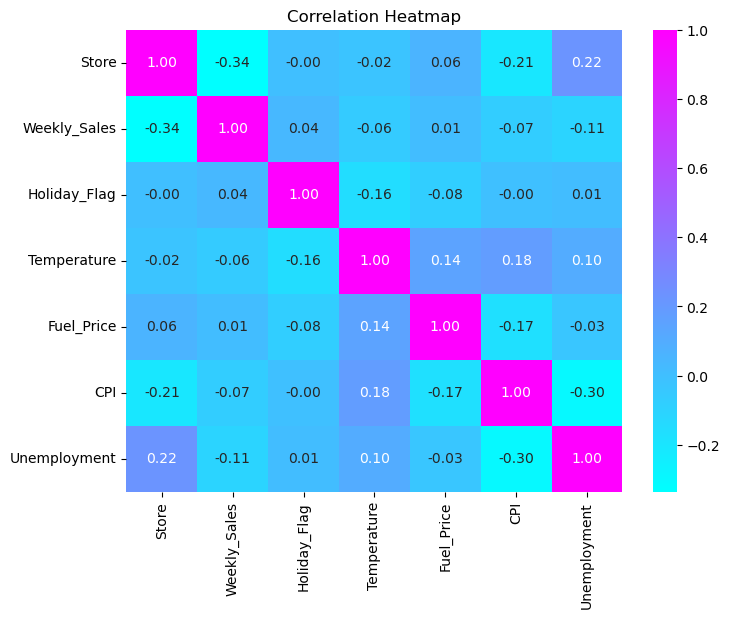

In [13]:
#CORELATION

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="cool", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Top performing stores according to the historical data.**

Top Performing Stores by Total Weekly Sales:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


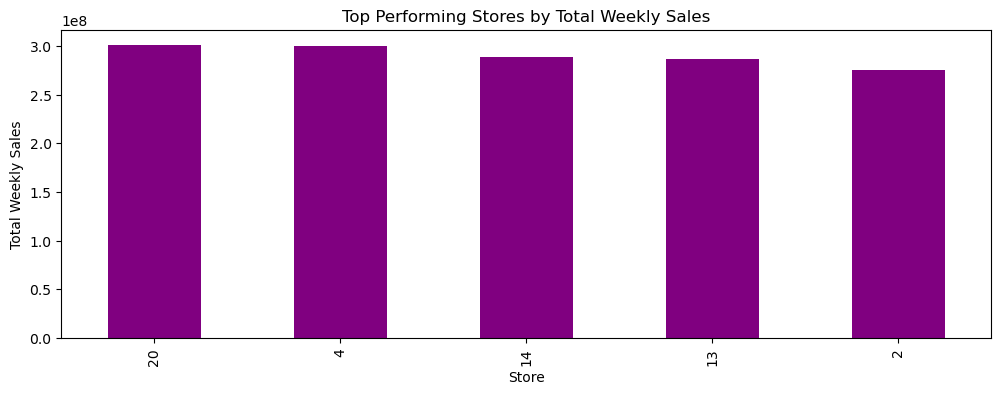

In [14]:
# Calculate total weekly sales for each store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()

# Sort stores based on total sales in descending order
top_stores_total_sales = total_sales_by_store.sort_values(ascending=False)

# Display the top-performing stores
print("Top Performing Stores by Total Weekly Sales:")
print(top_stores_total_sales.head())

# Bar plot for top-performing stores by total sales
plt.figure(figsize=(12, 4))
top_stores_total_sales.head().plot(kind='bar', color='purple')
plt.title('Top Performing Stores by Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()


**Worst Performing Store**

In [15]:
# Calculate total weekly sales for each store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()

# Identify the store with the minimum total sales
worst_performing_store = total_sales_by_store.idxmin()
worst_performing_sales = total_sales_by_store.min()

# Display the worst-performing store
print("Worst Performing Store:")
print("Store:", worst_performing_store)
print("Total Weekly Sales:", worst_performing_sales)

Worst Performing Store:
Store: 33
Total Weekly Sales: 37160221.96


**Total Wekly Sales by Store**

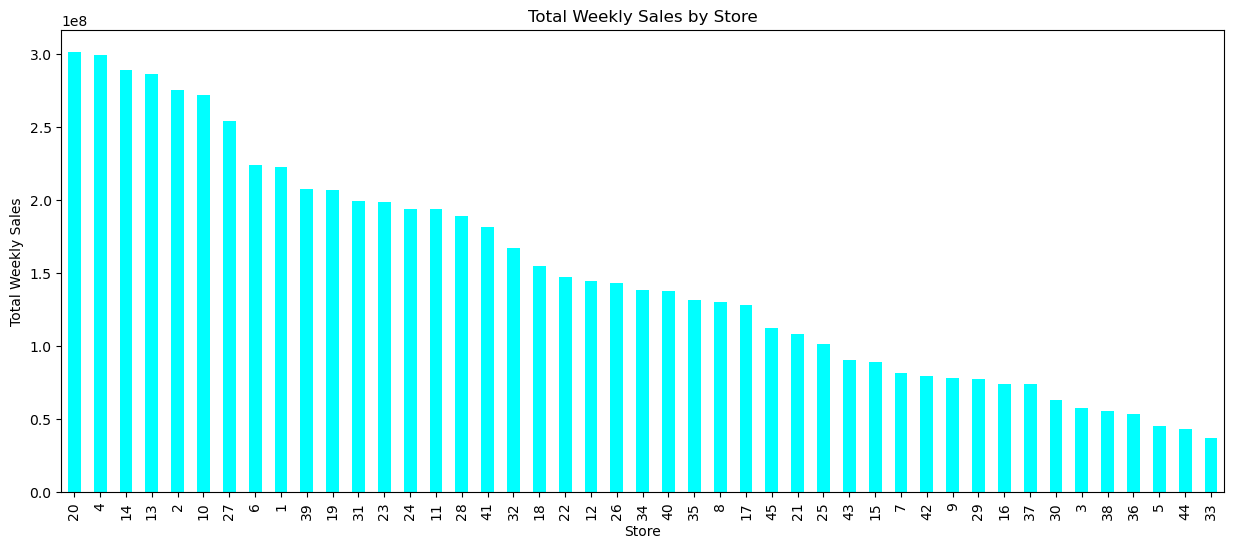

In [16]:
# Bar plot for total weekly sales by store
plt.figure(figsize=(15, 6))
sorted_total_sales = total_sales_by_store.sort_values(ascending=False)
sorted_total_sales.plot(kind='bar', color='cyan')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()


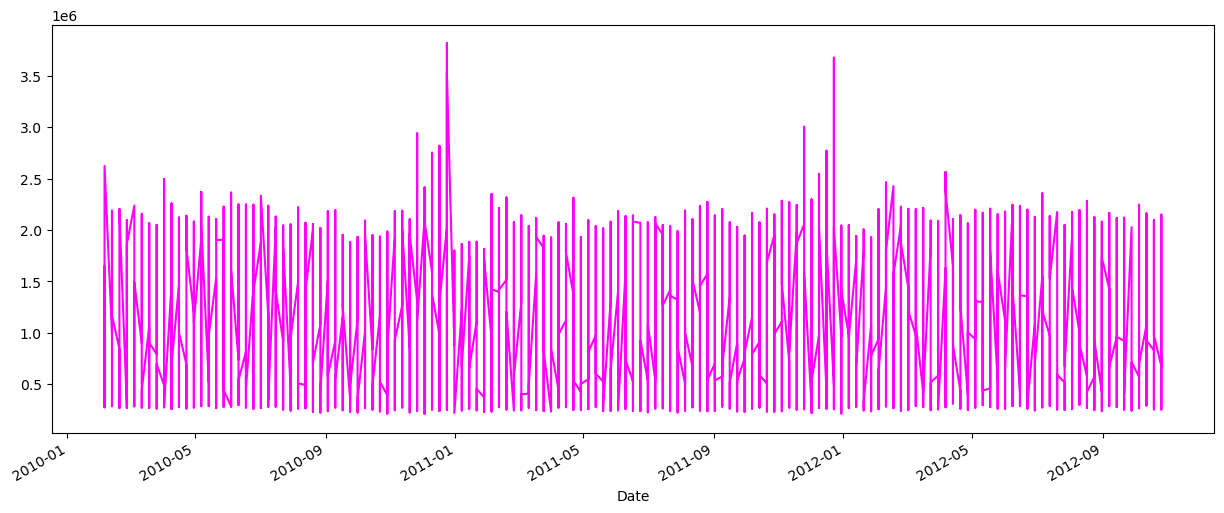

In [17]:
plt.figure(figsize=(15, 6))
df['Weekly_Sales'].plot(color="magenta")
plt.show()

In [18]:
df1 = df.copy()
df1['Month'] = df.Date.dt.month
df1['Year'] = df.Date.dt.year
df1['Day'] = df.Date.dt.day
df1['day_name'] = df.Date.dt.day_name()
df1['week'] = df.Date.dt.isocalendar().week
df1.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05      1 2010-02-05    1643690.90             0        42.31   
2010-02-12      1 2010-02-12    1641957.44             1        38.51   
2010-02-19      1 2010-02-19    1611968.17             0        39.93   
2010-02-26      1 2010-02-26    1409727.59             0        46.63   
2010-03-05      1 2010-03-05    1554806.68             0        46.50   

            Fuel_Price         CPI  Unemployment  Month  Year  Day day_name  \
Date                                                                          
2010-02-05       2.572  211.096358         8.106      2  2010    5   Friday   
2010-02-12       2.548  211.242170         8.106      2  2010   12   Friday   
2010-02-19       2.514  211.289143         8.106      2  2010   19   Friday   
2010-02-26       2.561  211.319643         8.106      2  2010   26   Friday   
2010-03-05       2.625  211.350143         8.106      3  2010    5   Friday   

            week  
Date              
2010-02-05     5  
2010-02-12     6  
2010-02-19     7  
2010-02-26     8  
2010-03-05     9

**WEEKLY_SALES BY MONTH**

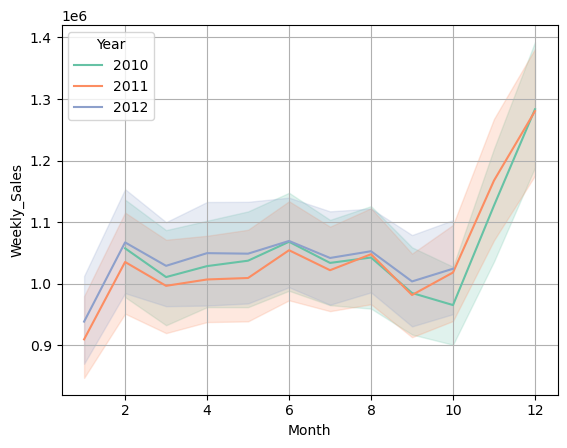

In [19]:
sns.lineplot(x='Month',y='Weekly_Sales', data=df1, hue='Year', palette='Set2')
plt.grid()
plt.show()

**WEEKLY_SALES BY WEEK**

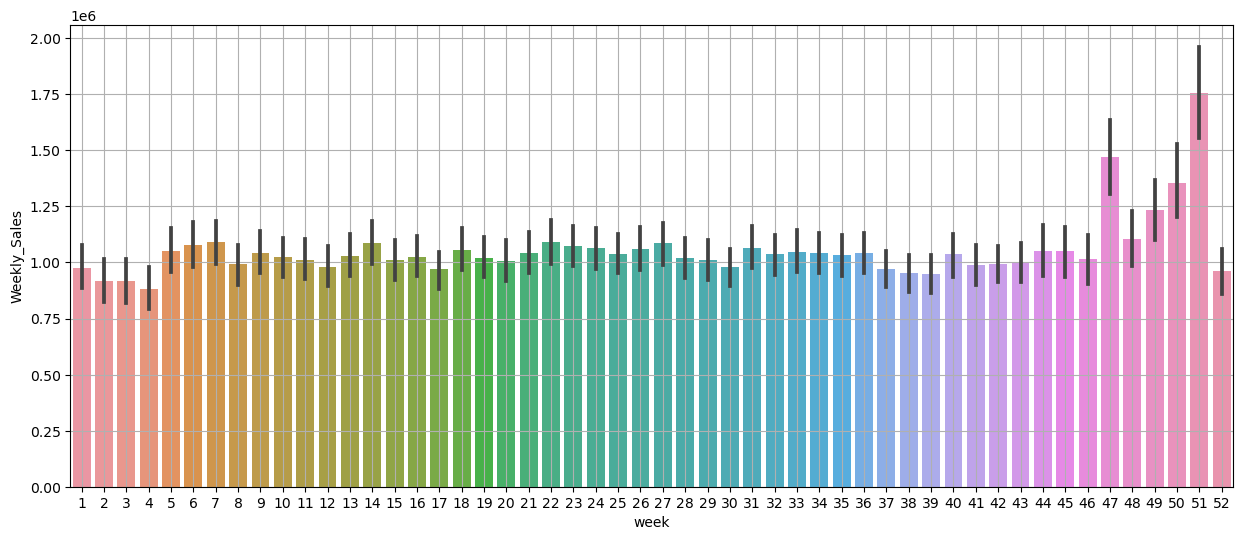

In [20]:
plt.figure(figsize=(15, 6))
sns.barplot(x='week',y='Weekly_Sales', data=df1)
plt.grid()
plt.show()

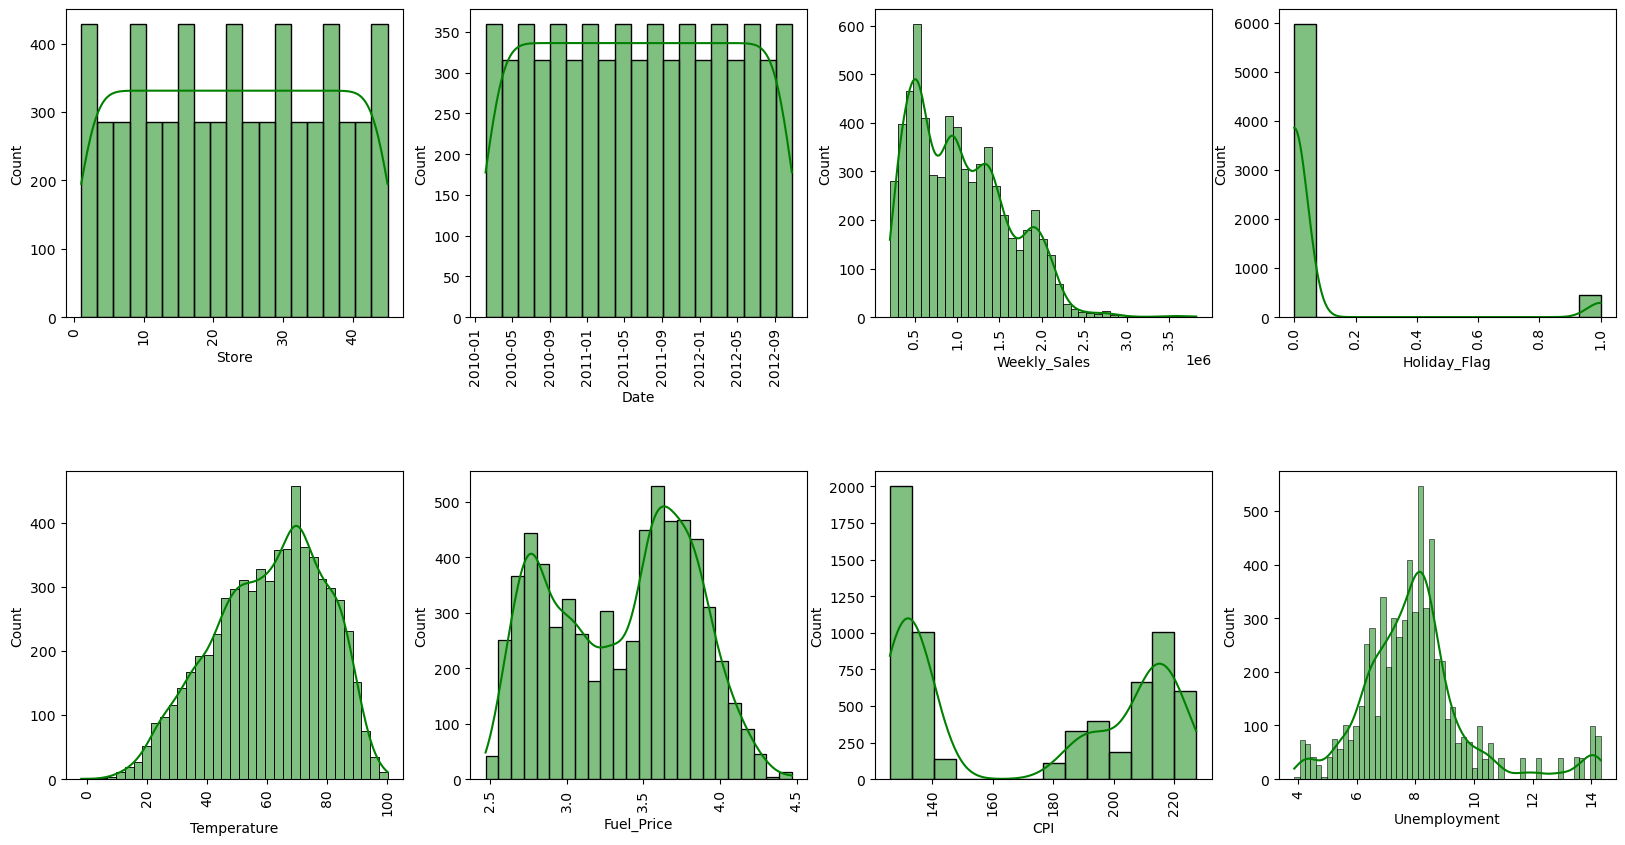

In [21]:
plt.subplots(2,4, figsize=(20,10))
i = 1
for col in col_list:
    plt.subplot(2,4,i)
    sns.histplot(df[col],kde=True,color='green')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.5)
    i += 1


### Seperating the dataframe based on the stores 

In [22]:
Stores = {}
for i in range(1,len(df.Store.unique())+1):
    Stores[i] = df1[df1['Store'] == i]

## Visualize all the stores

### Date vs Weekly_Sales of all 45 stores

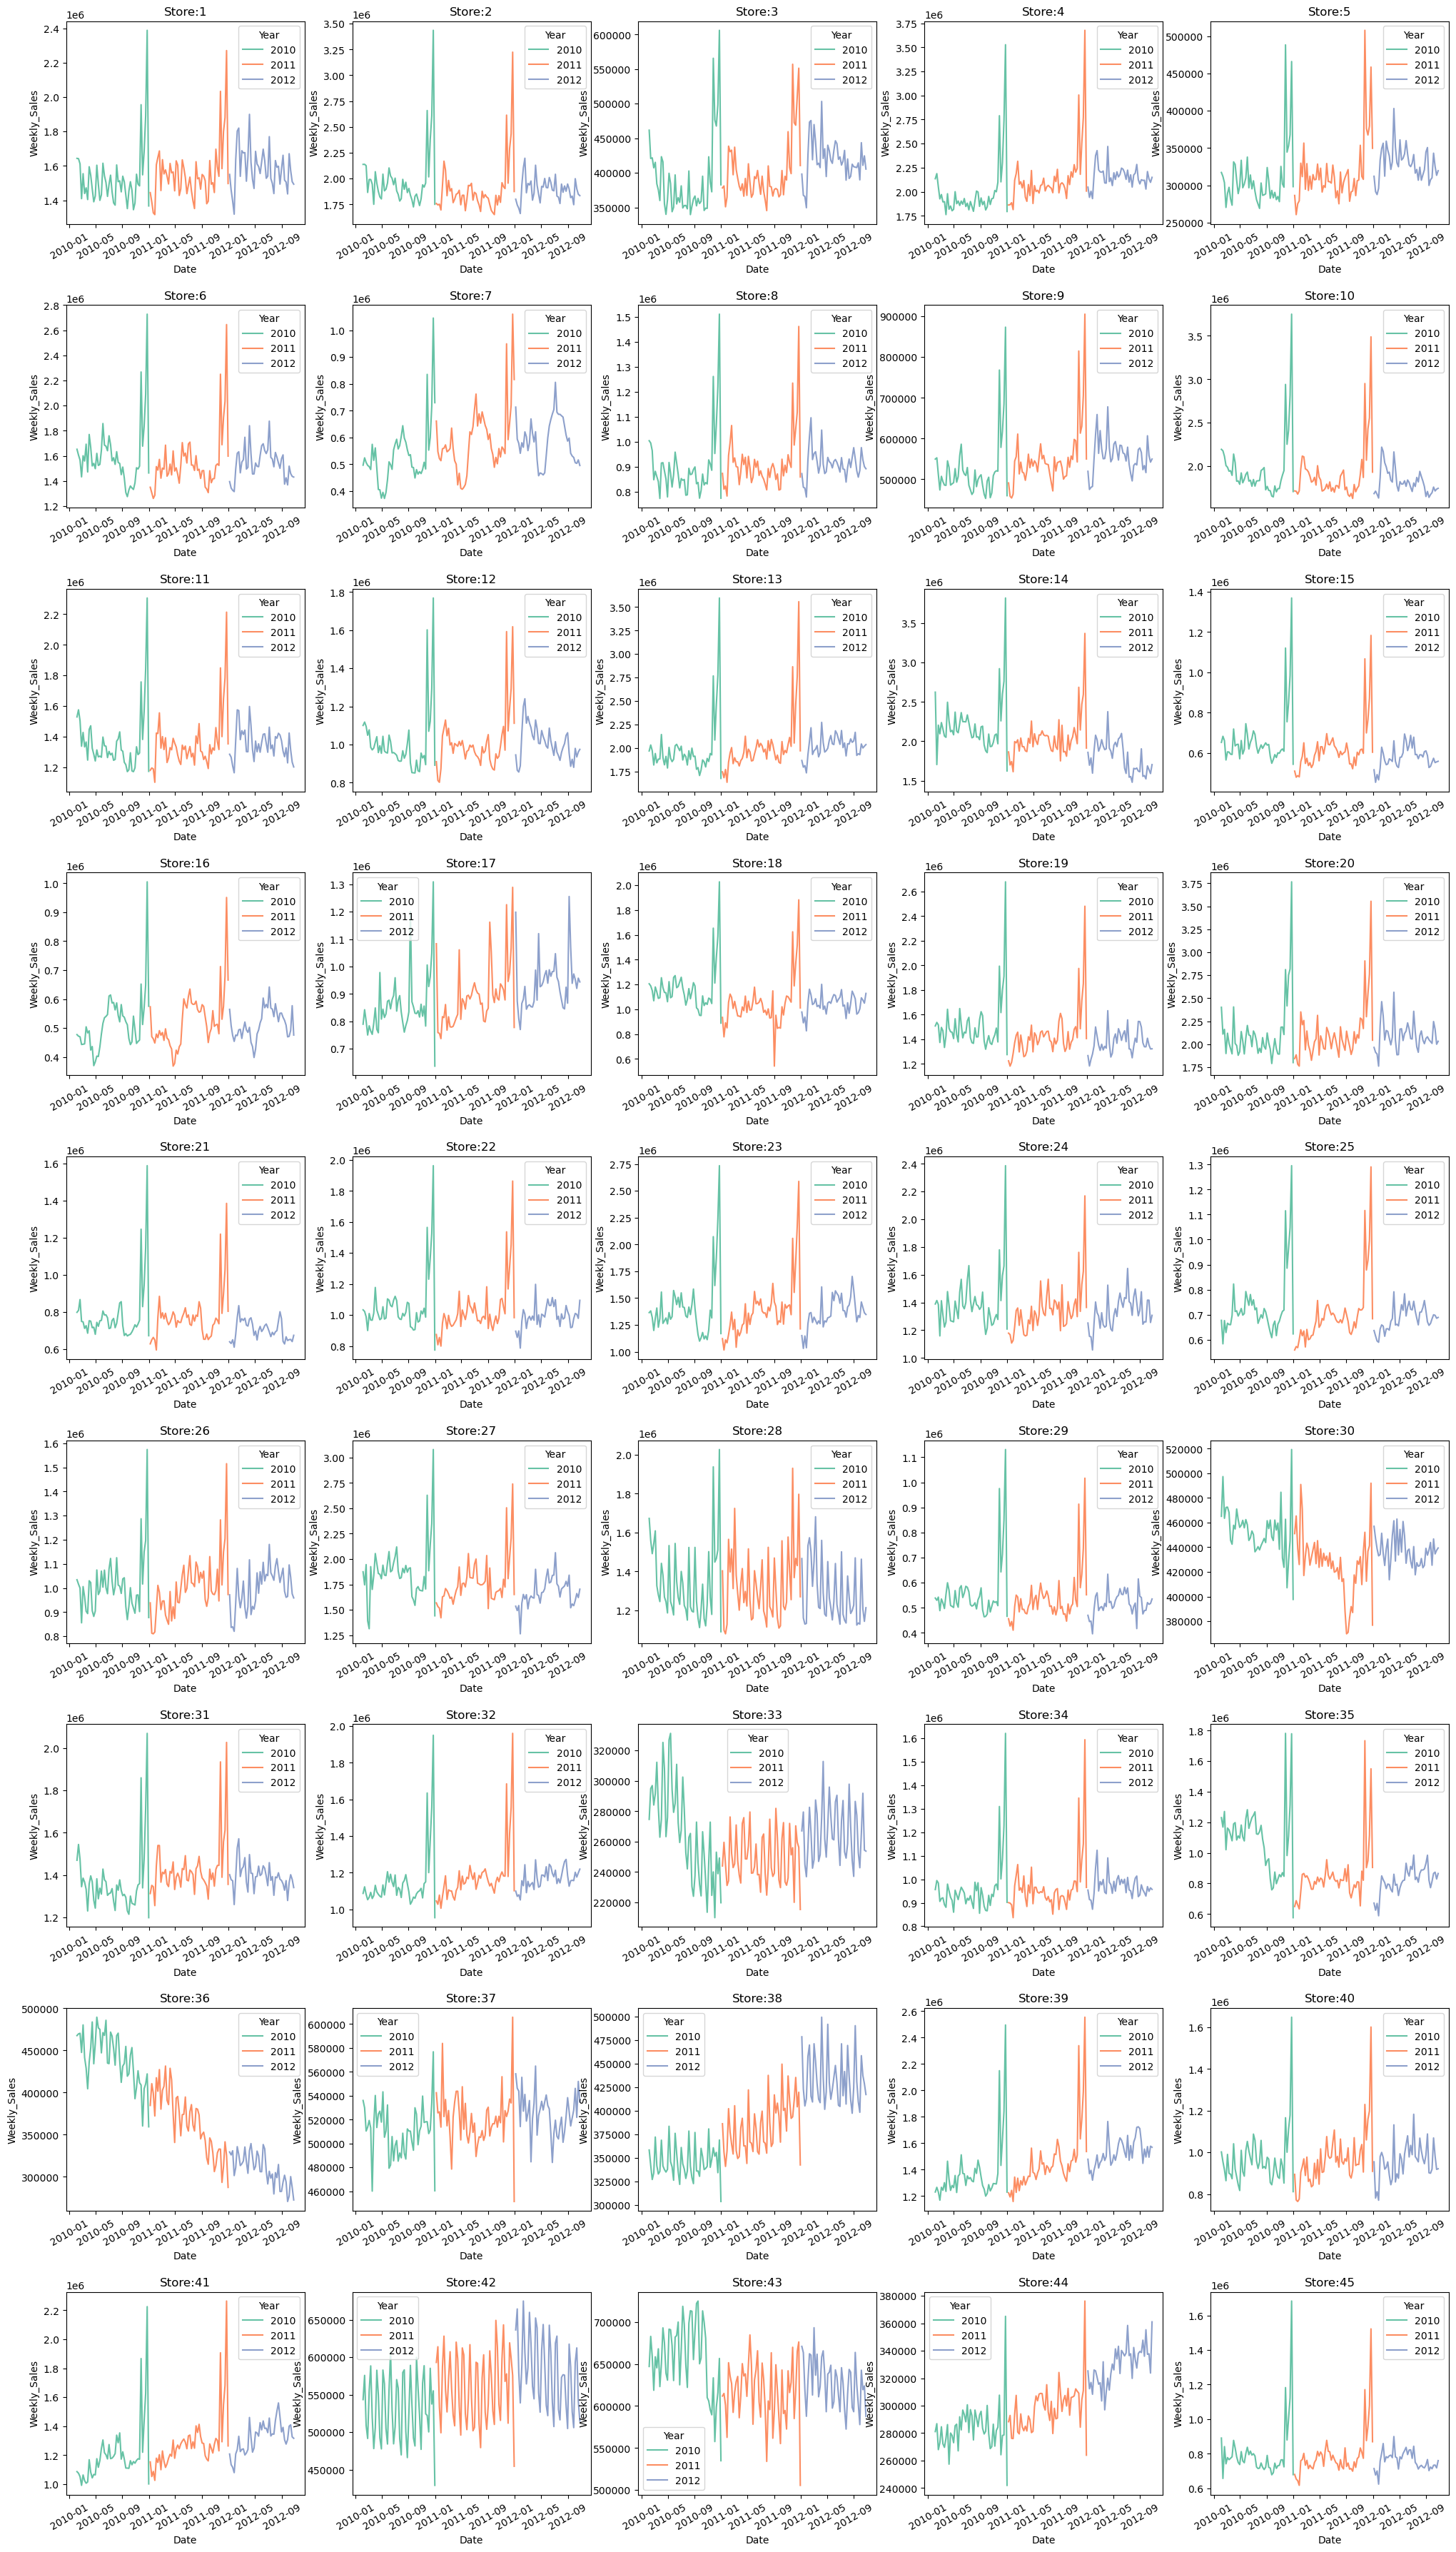

In [23]:
plt.subplots(9,5, figsize=(25,45))
for i in range (1,46):
    plt.subplot(9,5,i)
    sns.lineplot(x='Date', y='Weekly_Sales', data=Stores[i], hue='Year',palette='Set2')
    plt.title(f'Store:{i}')
    plt.xticks(rotation=30)
    plt.subplots_adjust(hspace=0.4)


# Time series Forecasting (ARIMA)

In [24]:
df1 = Stores[1]
df1 = df1.loc[:,['Date', 'Weekly_Sales']]
df1.index = df1['Date']
df1.drop(['Date'], axis=1, inplace=True)
df1.head()

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68

In [25]:
df1.shape

(143, 1)

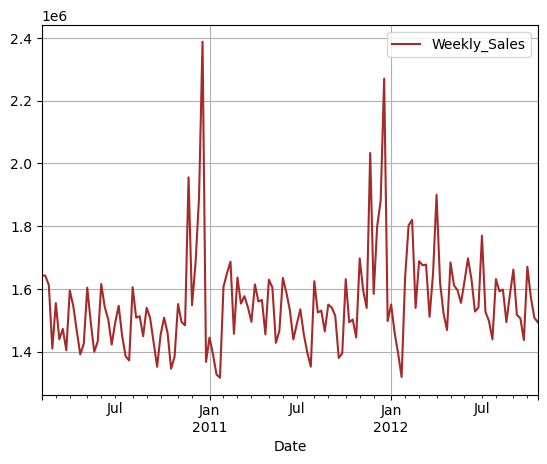

In [26]:
df1.plot(color='brown')
plt.grid()
plt.show()

### Stationarity test

In [27]:
from statsmodels.tsa.stattools import adfuller
# p-value>0.05 --> not stationary --> Null Hyp
# p-value<0.05 --> stationary --> Alt Hyp
result = adfuller(df1['Weekly_Sales'])
p_value = result[1]
print(p_value)
if p_value<0.05:
    print('Stationary')
else:
    print('Not stationary')

1.3877788330759535e-05
Stationary


In [28]:
# KPSS test( Kwiatkowski–Phillips–Schmidt–Shin test)
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical = kpss(df1['Weekly_Sales'])
if p>0.05:
    print('Stationary')
else:
    print('Not stationary')
print(p)

Not stationary
0.047095888148842614


**Seasionality of this data is one year, so we take window 52
(52 weeks per year).**

In [29]:
rolling_mean = df1.rolling(window=52).mean()
rolling_mean

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
...                  ...
2012-09-28  1.613969e+06
2012-10-05  1.614734e+06
2012-10-12  1.616264e+06
2012-10-19  1.616370e+06
2012-10-26  1.617300e+06

[143 rows x 1 columns]

**Removing the trend from the timestamp if trend is present**

In [30]:
rolling_mean_detrended = df1-rolling_mean
rolling_mean_detrended

Weekly_Sales
Date                     
2010-02-05            NaN
2010-02-12            NaN
2010-02-19            NaN
2010-02-26            NaN
2010-03-05            NaN
...                   ...
2012-09-28 -176909.317308
2012-10-05   56052.084615
2012-10-12  -43190.823077
2012-10-19 -108300.747500
2012-10-26 -123640.751538

[143 rows x 1 columns]

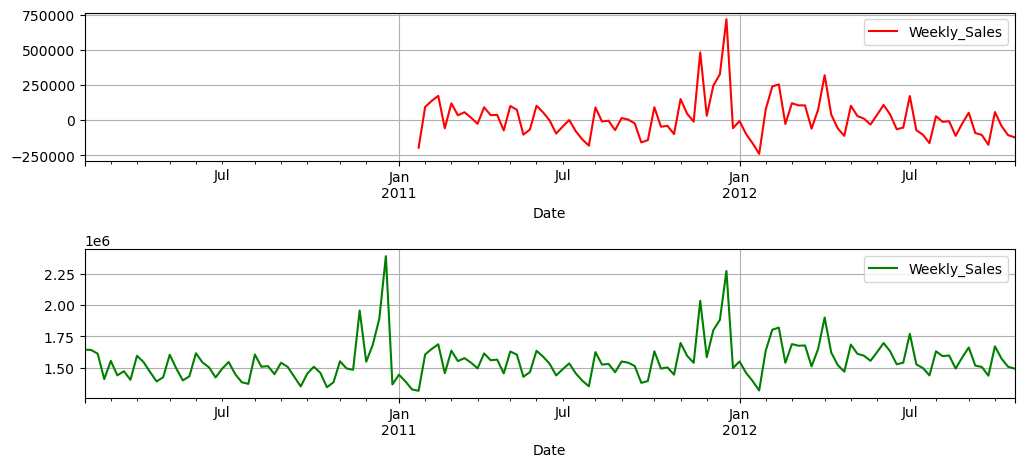

In [31]:
ax1 = plt.subplot(211)
rolling_mean_detrended.plot(figsize=(12,5),color='red',ax=ax1)
plt.grid()
ax2 = plt.subplot(212)
df1.plot(figsize=(12,5),color='green',ax=ax2)
plt.subplots_adjust(hspace=0.6)
plt.grid()
plt.show()

**Removing seasonality**

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna(), period=25)

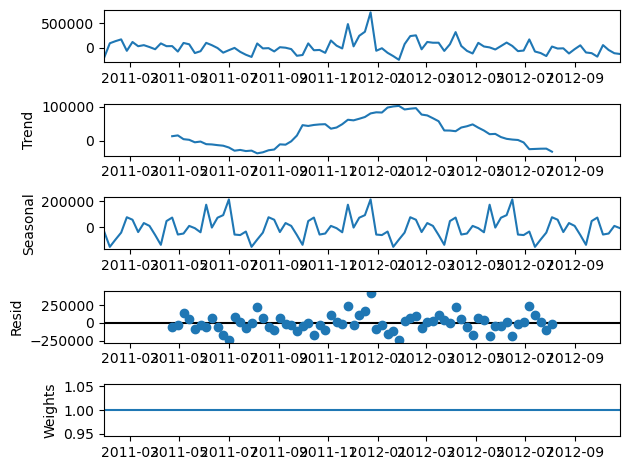

In [33]:
decompose_result.plot(weights=True)
plt.show()

In [34]:
# removing seasionality
rolling_mean_decomposed_diff = rolling_mean_detrended - rolling_mean_detrended.shift()
rolling_mean_decomposed_diff

Weekly_Sales
Date                     
2010-02-05            NaN
2010-02-12            NaN
2010-02-19            NaN
2010-02-26            NaN
2010-03-05            NaN
...                   ...
2012-09-28  -69884.058269
2012-10-05  232961.401923
2012-10-12  -99242.907692
2012-10-19  -65109.924423
2012-10-26  -15340.004038

[143 rows x 1 columns]

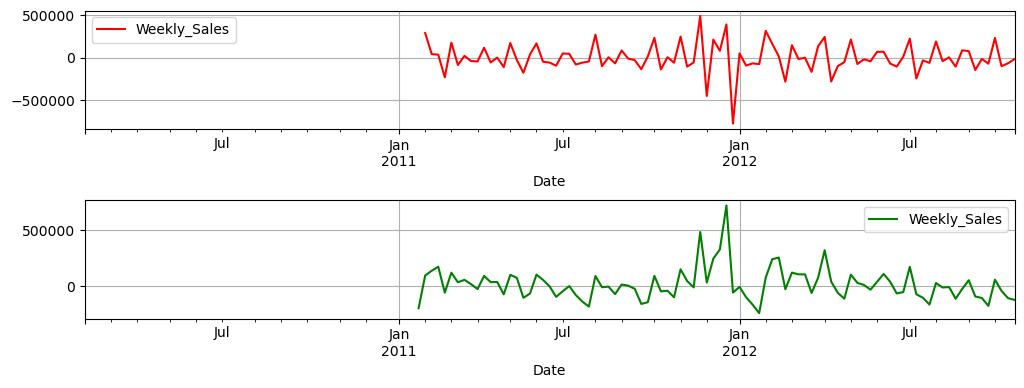

In [35]:
ax1=plt.subplot(211)
rolling_mean_decomposed_diff.plot(figsize=(12,4),color='red',ax=ax1)
plt.grid()
ax2=plt.subplot(212)
rolling_mean_detrended.plot(figsize=(12,4),color='green',ax=ax2)
plt.subplots_adjust(hspace=0.6)
plt.grid()
plt.show()
plt.show()

In [36]:
rolling_mean_decomposed_diff.dropna(inplace=True)
rolling_mean_decomposed_diff

Weekly_Sales
Date                     
2011-02-04  290442.987692
2011-02-11   42838.090577
2011-02-18   35787.953654
2011-02-25 -230947.744038
2011-03-04  177896.654423
...                   ...
2012-09-28  -69884.058269
2012-10-05  232961.401923
2012-10-12  -99242.907692
2012-10-19  -65109.924423
2012-10-26  -15340.004038

[91 rows x 1 columns]

In [37]:
final = adfuller(rolling_mean_decomposed_diff['Weekly_Sales'])
final[1]

3.257853293563733e-07

### Visualize ACF and PACF to choose the Times seris model

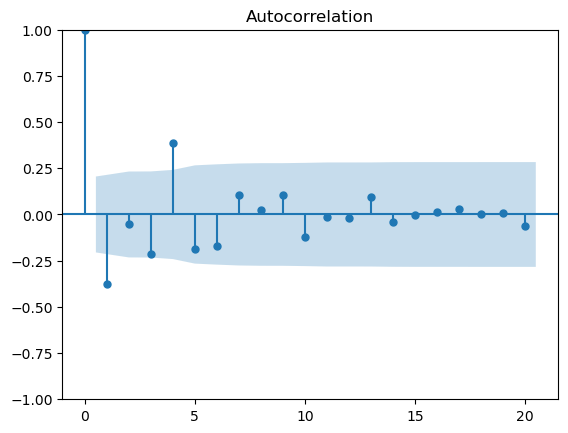

In [38]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(rolling_mean_decomposed_diff['Weekly_Sales'])
plt.show()

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


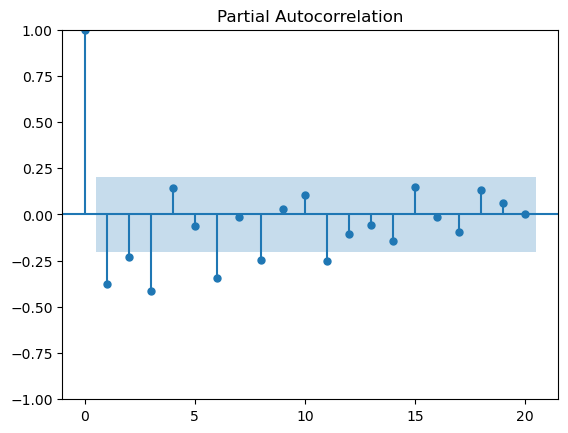

In [39]:
plot_pacf(rolling_mean_decomposed_diff['Weekly_Sales'])
plt.show()

### Choosing the best model using autoarima

In [40]:
from pmdarima import auto_arima
order = auto_arima(rolling_mean_decomposed_diff['Weekly_Sales'],trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2428.230, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2454.958, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2442.923, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2426.044, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2452.960, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2426.893, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2426.900, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2428.257, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2422.325, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2421.076, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2440.908, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2424.524, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2423.465, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1207.538
Date:                Mon, 12 Feb 2024   AIC                           2421.076
Time:                        21:34:50   BIC                           2428.608
Sample:                    02-04-2011   HQIC                          2424.115
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2370      0.116      2.050      0.040       0.010       0.464
ma.L1         -0.9361      0.054    -17.315      0.000      -1.042      -0.830
sigma2      2.002e+10   7.21e-13   2.78e+22      0.000       2e+10       2e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                83.49
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             1.39
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+38. Standard errors may be unstable.
"""

In [41]:
train = rolling_mean_decomposed_diff.iloc[:73]['Weekly_Sales']
test = rolling_mean_decomposed_diff.iloc[73:]['Weekly_Sales']

from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model=SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,52),enforce_stationarity=False)
model=model.fit()

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


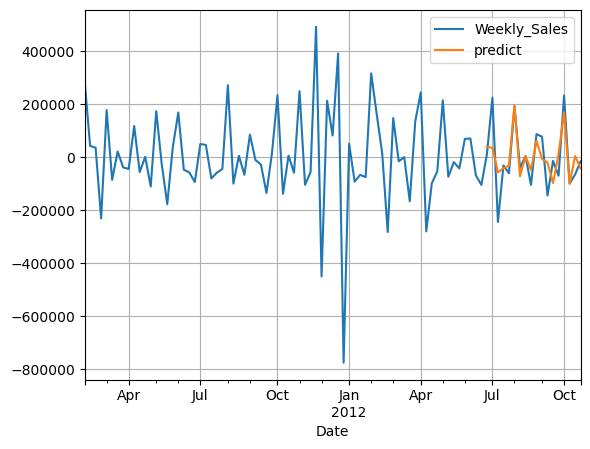

In [42]:
rolling_mean_decomposed_diff['predict'] = model.predict(start= len(train) ,
                                           end=len(train)+len(test)- 1, 
                                           dynamic=True)
rolling_mean_decomposed_diff[['Weekly_Sales','predict']].plot()
plt.grid()
plt.show()

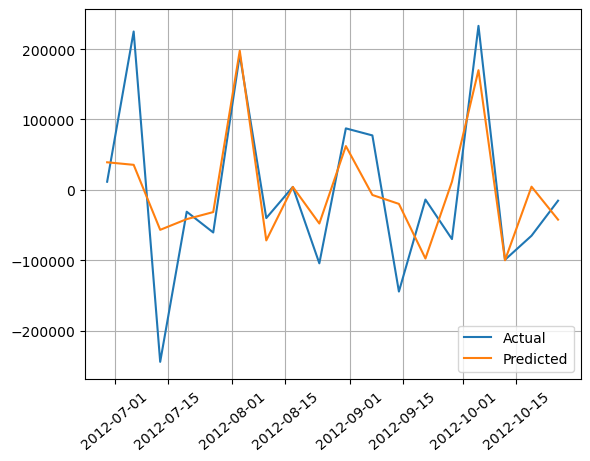

In [43]:
plt.plot(test, label='Actual')
plt.plot(rolling_mean_decomposed_diff['predict'], label='Predicted')
plt.grid()
plt.xticks(rotation=40)
plt.legend()

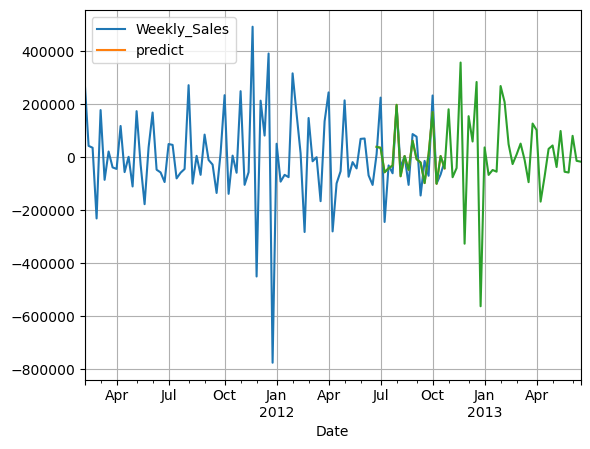

In [44]:
#predicting the projections for the next 1 year

forecast = model.forecast(steps=52)
rolling_mean_decomposed_diff.plot()
forecast.plot()
plt.grid()
plt.show()

**MODEL EVALUATION**

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train=train
y_true = test
y_pred = rolling_mean_decomposed_diff['predict'].dropna()

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mas = mean_absolute_scaled_error(y_true, y_pred, y_train)
r2 = r2_score(y_true, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Scaled Error:', mas)
print('R^2 Score:', r2)


Mean Absolute Error: 60986.50124877769
Mean Squared Error: 6857586324.358059
Root Mean Squared Error: 82810.54476549504
Mean Absolute Scaled Error: 0.2940677380502227
R^2 Score: 0.5466095127292332


### Lets forecast next 12 weeks of sales for each stores

In [46]:
predictions = {}
for i in range(1,len(df.Store.unique())+1):
    store = Stores[i]
    store = store.loc[:,['Date','Weekly_Sales']]
    store.index = store['Date']
    store.drop(['Date'],axis=1,inplace=True)
    model=SARIMAX(store,order=(1,0,1),seasonal_order=(1,0,1,52),enforce_stationarity=False)
    model=model.fit()
    predict = model.predict(start= len(store) ,end=len(store)+52, dynamic=True)
    predictions[i] = predict

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

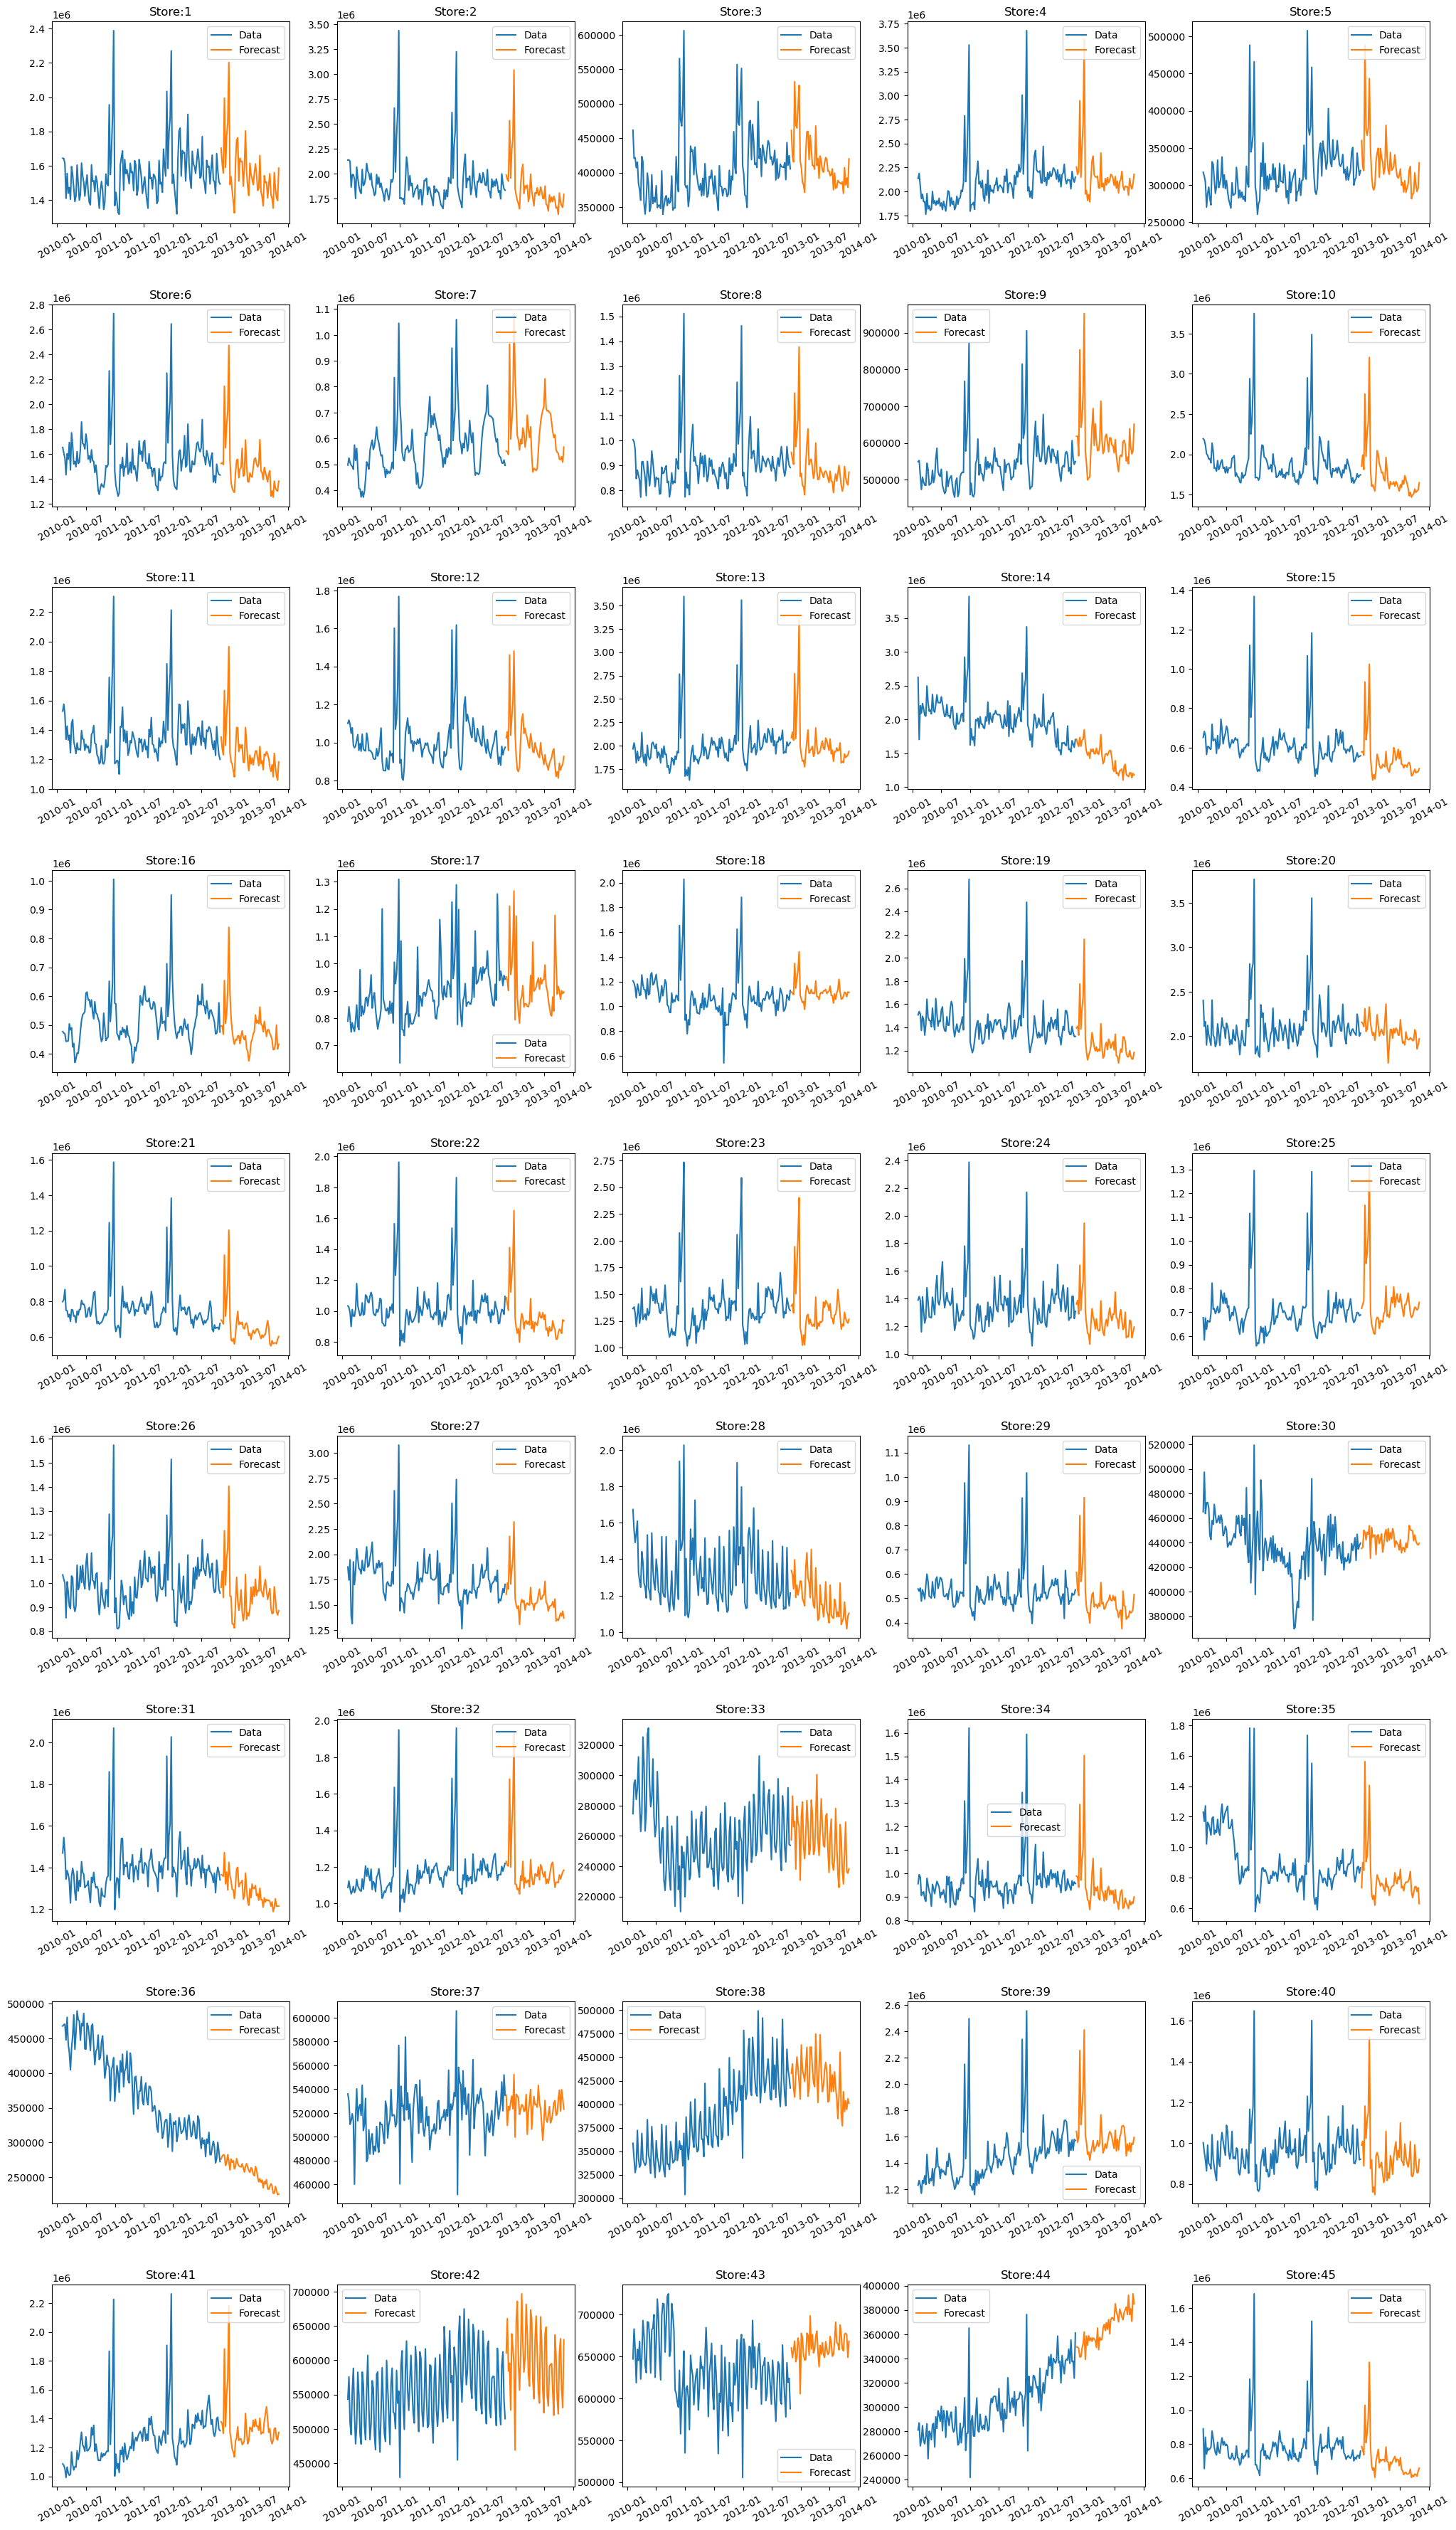

In [47]:
plt.subplots(9,5, figsize=(25,45))
for i in range (1,46):
    store=Stores[i]
    store = store.loc[:,['Date','Weekly_Sales']]
    store.index = store['Date']
    store.drop(['Date'],axis=1, inplace=True)
    predict = predictions[i]
    plt.subplot(9,5,i)
    plt.plot(store,label='Data')
    plt.plot(predict,label='Forecast')
    plt.title(f'Store:{i}')
    plt.legend()
    plt.xticks(rotation=30)
    plt.subplots_adjust(hspace=0.4)


## Conclusion

 From the above graph we can see that the Stores 14,20,28,30,31,37,44 are having poor forecasting. Overall 38 stores out of 45 are forecasted well successfully using the SARIMAX model with the order = (1,0,1) and seasonal order = (1,0,1,52). The Mean Absolute Scaled error of this model is 0.3.

# PROPHET

In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('Walmart.csv')

In [50]:
# Step 1: Filter dataset for Store 1
store_1_df = df[df['Store'] == 1]

In [51]:
# Convert the date column to datetime
store_1_df['Date'] = pd.to_datetime(store_1_df['Date'], dayfirst = True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_14896\1745941358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1_df['Date'] = pd.to_datetime(store_1_df['Date'], dayfirst = True)


In [52]:
# Step 3: Rename columns
store_1_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_14896\2840147686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)


In [53]:
store_1_df

Store         ds           y  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-05  1643690.90             0        42.31       2.572   
1        1 2010-02-12  1641957.44             1        38.51       2.548   
2        1 2010-02-19  1611968.17             0        39.93       2.514   
3        1 2010-02-26  1409727.59             0        46.63       2.561   
4        1 2010-03-05  1554806.68             0        46.50       2.625   
..     ...        ...         ...           ...          ...         ...   
138      1 2012-09-28  1437059.26             0        76.08       3.666   
139      1 2012-10-05  1670785.97             0        68.55       3.617   
140      1 2012-10-12  1573072.81             0        62.99       3.601   
141      1 2012-10-19  1508068.77             0        67.97       3.594   
142      1 2012-10-26  1493659.74             0        69.16       3.506   

            CPI  Unemployment  
0    211.096358         8.106  
1    211.242170         8.106  
2    211.289143         8.106  
3    211.319643         8.106  
4    211.350143         8.106  
..          ...           ...  
138  222.981658         6.908  
139  223.181477         6.573  
140  223.381296         6.573  
141  223.425723         6.573  
142  223.444251         6.573  

[143 rows x 8 columns]

In [54]:
from prophet import Prophet

# Step 4: Train the Prophet model
prophet_model = Prophet(
    changepoint_prior_scale=0.5,  # Adjust changepoint prior scale
    seasonality_prior_scale=10.0,  # Adjust seasonality prior scale
    holidays_prior_scale=10.0,  # Adjust holidays prior scale
    yearly_seasonality=True,  # Include yearly seasonality
)
prophet_model.fit(store_1_df)

21:36:26 - cmdstanpy - INFO - Chain [1] start processing
21:36:26 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
# Step 5: Make predictions for the next 1 year
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

In [56]:
# Step 6: Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

actual_values = store_1_df['y']
predicted_values = forecast['yhat'][:len(actual_values)]

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = sqrt(mse)

In [57]:
# Additional metrics
residuals = actual_values - predicted_values
mas = (residuals.abs() / actual_values).mean()
r2 = r2_score(actual_values, predicted_values)

# Print evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Scaled Error:', mas)
print('R^2 Score:', r2)

Mean Absolute Error: 75542.20235706134
Mean Squared Error: 11335496816.87365
Root Mean Squared Error: 106468.29019418715
Mean Absolute Scaled Error: 0.047602255393065236
R^2 Score: 0.5308128113099679


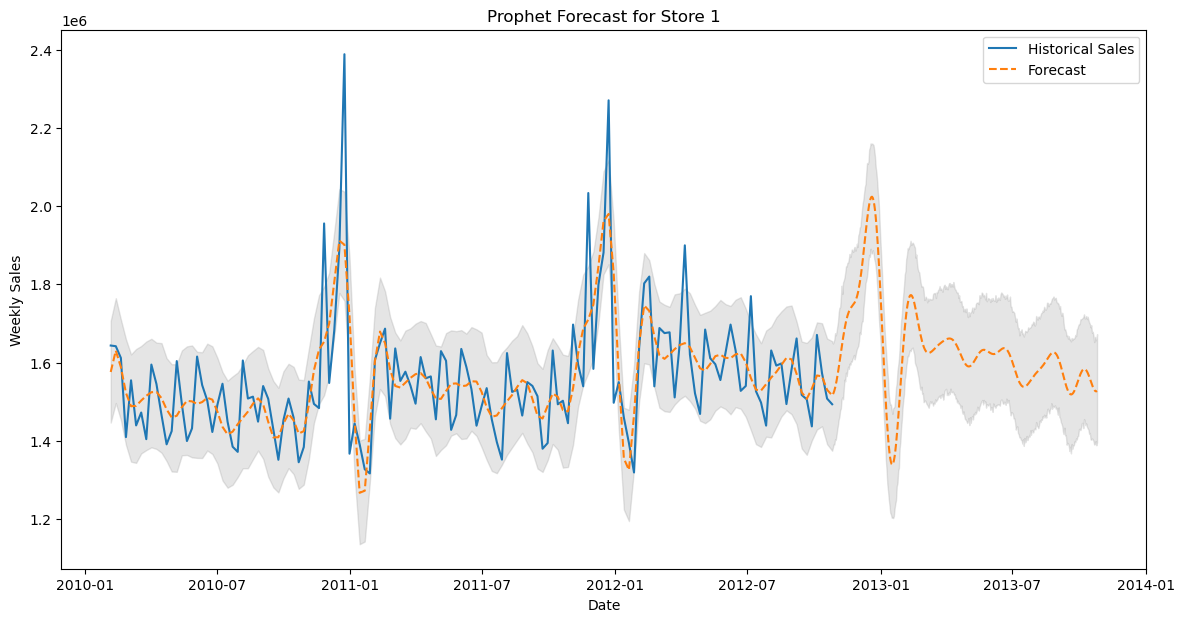

In [58]:
# Plot the historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(store_1_df['ds'], store_1_df['y'], label='Historical Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.title('Prophet Forecast for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


In [59]:
# Function to train Prophet model and make predictions for each store
def predict_for_all_stores(df):
    forecasts = []
    for store_id in range(1, 46):  # Assuming store IDs range from 1 to 45
        # Filter data for the current store
        store_df = df[df['Store'] == store_id].copy()  # Ensure a copy of the DataFrame is made
        # Convert date column to datetime
        store_df['Date'] = pd.to_datetime(store_df['Date'], dayfirst=True)
        # Rename columns for Prophet
        store_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)
        
        # Train Prophet model
        prophet_model = Prophet()
        prophet_model.fit(store_df)
        
        # Make future dataframe for predictions
        future = prophet_model.make_future_dataframe(periods=365)  # Predict for the next 1 year
        
        # Predict sales
        forecast = prophet_model.predict(future)
        forecast['Store'] = store_id  # Add store ID to the forecast DataFrame
        forecasts.append(forecast)
    
    return forecasts

# Call the function to get forecasts for all stores
forecasts_all_stores = predict_for_all_stores(df)

# Concatenate forecasts for all stores into a single DataFrame
all_stores_forecast_df = pd.concat(forecasts_all_stores)


21:36:27 - cmdstanpy - INFO - Chain [1] start processing
21:36:27 - cmdstanpy - INFO - Chain [1] done processing
21:36:27 - cmdstanpy - INFO - Chain [1] start processing
21:36:27 - cmdstanpy - INFO - Chain [1] done processing
21:36:28 - cmdstanpy - INFO - Chain [1] start processing
21:36:28 - cmdstanpy - INFO - Chain [1] done processing
21:36:28 - cmdstanpy - INFO - Chain [1] start processing
21:36:28 - cmdstanpy - INFO - Chain [1] done processing
21:36:28 - cmdstanpy - INFO - Chain [1] start processing
21:36:28 - cmdstanpy - INFO - Chain [1] done processing
21:36:29 - cmdstanpy - INFO - Chain [1] start processing
21:36:29 - cmdstanpy - INFO - Chain [1] done processing
21:36:29 - cmdstanpy - INFO - Chain [1] start processing
21:36:29 - cmdstanpy - INFO - Chain [1] done processing
21:36:29 - cmdstanpy - INFO - Chain [1] start processing
21:36:30 - cmdstanpy - INFO - Chain [1] done processing
21:36:30 - cmdstanpy - INFO - Chain [1] start processing
21:36:30 - cmdstanpy - INFO - Chain [1]

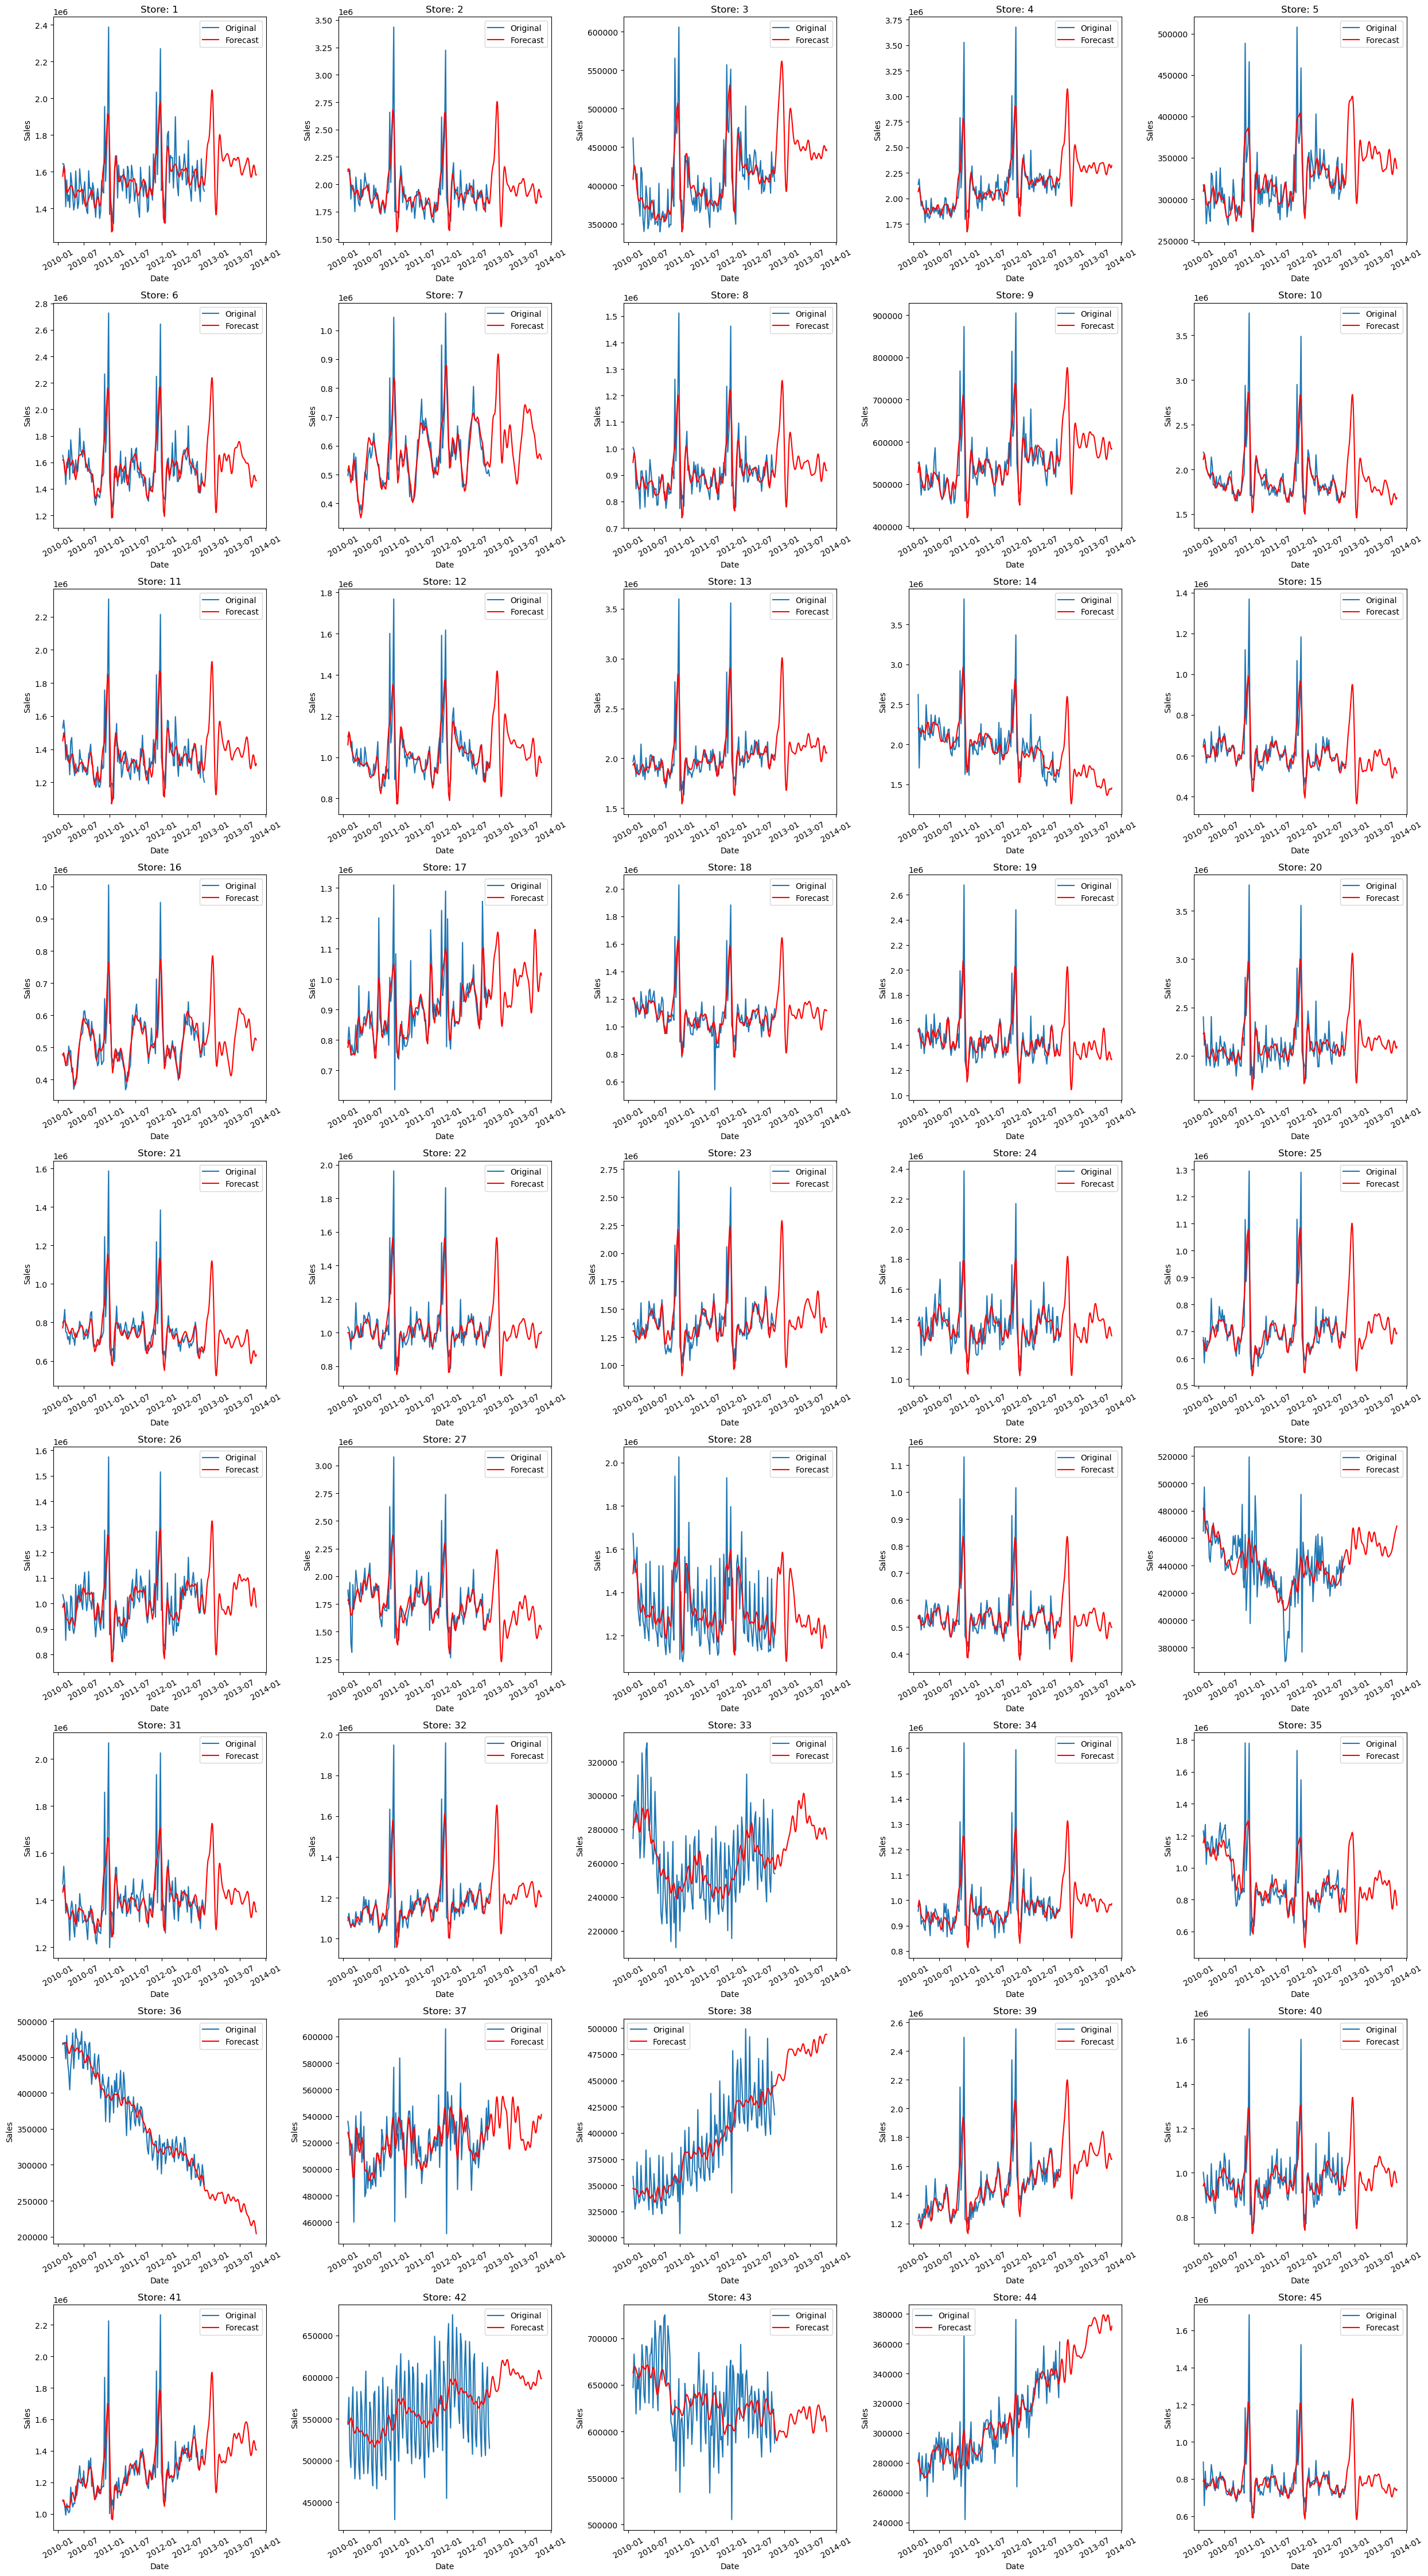

In [63]:
plt.subplots(9, 5, figsize=(25, 45))

for i in range(1, 46):
    store_forecast = all_stores_forecast_df[all_stores_forecast_df['Store'] == i]
    
    # Get original weekly sales data for the current store
    original_sales_data = df[df['Store'] == i].copy()  # 
    original_sales_data['Date'] = pd.to_datetime(original_sales_data['Date'], dayfirst=True)  # Convert to datetime
    
    plt.subplot(9, 5, i)
    plt.plot(original_sales_data['Date'], original_sales_data['Weekly_Sales'], label='Original')
    plt.plot(store_forecast['ds'], store_forecast['yhat'], label='Forecast',color='red')
    plt.title(f'Store: {i}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()
